# Table Parsing

In [54]:
import layoutparser as lp 

import matplotlib.pyplot as plt
%matplotlib inline 

import pandas as pd
import numpy as np
import cv2
import pytesseract
from detectron2 import model_zoo

In [7]:
ocr_agent = layoutparser.ocr.TesseractAgent()

In [8]:
image = cv2.imread("/Volumes/DATA_LAKE/example_images/table2.png")

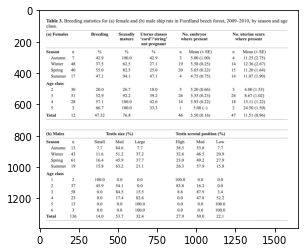

In [10]:
plt.imshow(image);

In [49]:
res = ocr_agent.detect(image, return_response=True)

In [43]:
res

{'text': 'Table 3. Breeding statistics for (a) female and (b) male ship rats in Fiordland beech forest, 2009-2010, by season and age\nclass.\n\n \n\n \n\n \n\n \n\n \n\n(a) Females Breeding Sexually Uterus classes No. embryos No. uterine scars\nmature ‘cord’/‘string’ where present where present\nnot pregnant\nSeason n % % % n Mean ( SE) n Mean (+ SE)\nAutumn 7 42.9 100.0 42.9 3 5.00 (1.00) 4 11.25 (2.75)\nWinter 48 37.5 62.5 27.1 19 5.58 (0.25) 14 12.36 (2.67)\nSpring 40 55.0 82.5 25.0 20 5.65 (0.22) 15 11.20 (1.64)\nSummer 17 47.1 94.1 47.1 4 4.75 (0.75) 14 11.07 (1.90)\nAge class\n2 30 20.0 26.7 10.0 5 5.20 (0.66) 3 4.00 (1.53)\n3 51 52.9 92.2 39.2 26 = 5.35 (0.23) 24 8.67 (1.02)\n4 28 57.1 100.0 42.6 14 5.93 (0.22) 18 15.11 (1.22)\n5 3 66.7 100.0 33.3 1 5.00 (-) 2 24.50 (1.50)\nTotal 12 47.32 76.8 46 5.50 (0.16) 47 11.51 (0.96)\n(b) Males Testis size (%) Testis scrotal position (%)\nSeason n Small Med Large High Med Low\nAutumn 13 17 84.6 77 38.5 53.8 17\nWinter 43 11.6 51.2 37.2 32

In [51]:
ocr_agent.gather_data(res, agg_level='text')

AssertionError: Invalid agg_level text

# Deep Learning Detection

In [63]:
model = lp.Detectron2LayoutModel(
            config_path ='lp://TableBank/faster_rcnn_R_101_FPN_3x/config', # In model catalog
            label_map   ={0: "Table"}, # In model`label_map`
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
        )

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [64]:
layout = model.detect(image)

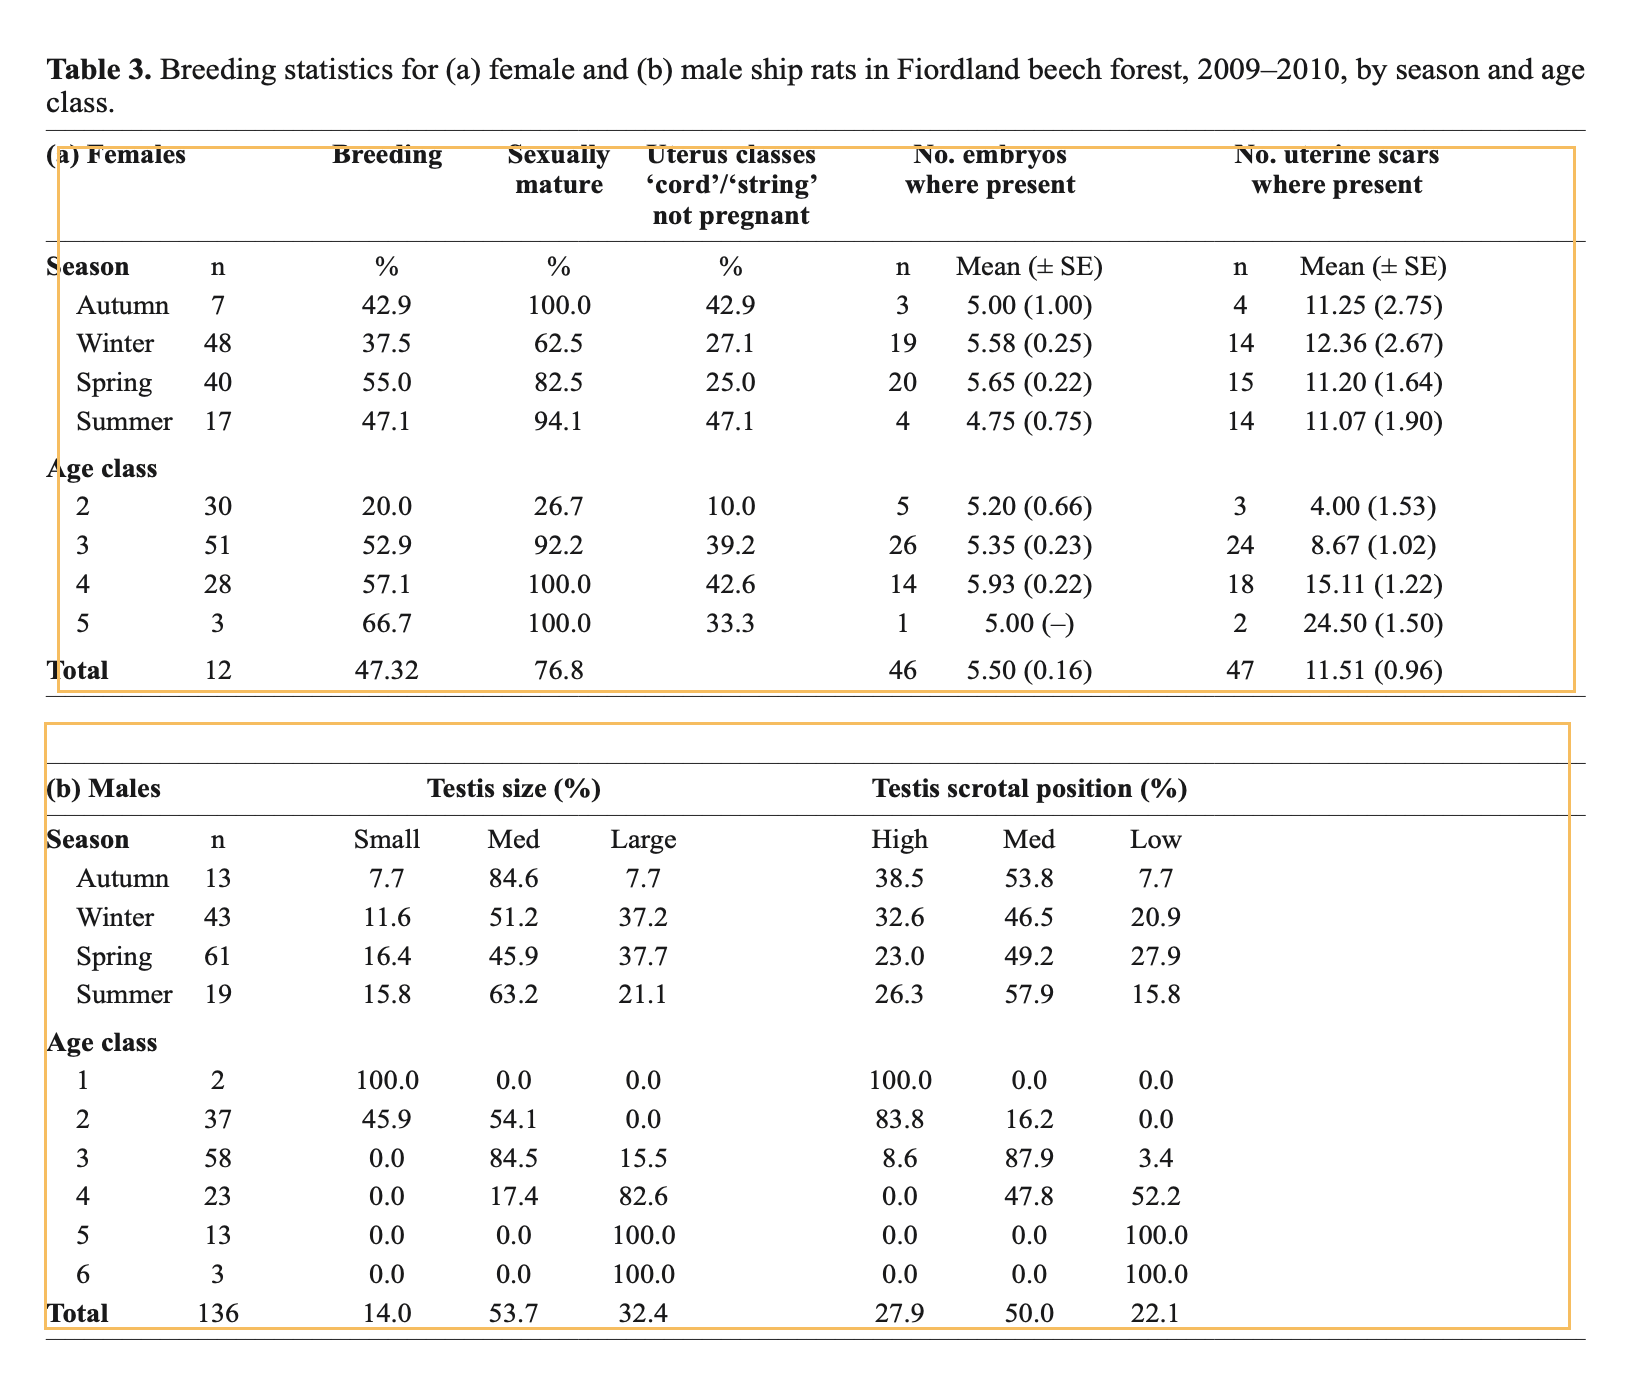

In [65]:
lp.draw_box(image, layout, box_width=3)

## Check the results from the model.

In [66]:
type(layout)

layoutparser.elements.Layout